In [1]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.21492286 0.02587847 0.25838172 ... 0.22620181 0.2428416  0.22695731]
 [0.699281   0.08419914 0.84068035 ... 0.73597861 0.79011844 0.73843673]
 [0.11104944 0.01337126 0.13350439 ... 0.11687721 0.1254749  0.11726758]
 ...
 [0.58709605 0.07069116 0.70581084 ... 0.6179063  0.66336052 0.61997006]
 [0.39152407 0.0471427  0.47069289 ... 0.41207089 0.44238351 0.41344717]
 [0.06589976 0.00793487 0.07922513 ... 0.06935811 0.07446021 0.06958976]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.07408389  0.10270462  0.26272292 ...  0.29033385  0.16945006
   0.27435107]
 [ 0.68761375  0.25954071  0.76661076 ...  0.88794619  0.73373616
   0.79440231]
 [ 0.01023197  0.10844822  0.02387619 ...  0.04132901  0.0395384
  -0.00201468]
 ...
 [ 0.49474456  0.11254285  0.77545666 ...  0.63809661  0.67601986
   0.66150719]
 [ 0.38357399 -0.15692378  0.67077782 ...  0.43483079  0.54286223
   0.51043759]
 [ 0.04482532  0.17236005 -0.10074284 ... -0.06460533 -0.00342237
   0.253

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [3]:
mycebmf= cEBMF(data= noisy_matrix)
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

 
mycebmf

In [4]:
K = np.min([K, U.shape[1]])
print(K)

5


In [5]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])


The array does not contain any missing values.
[ 0.12778462  0.02903893 -0.10219855  0.13190475 -0.13641412 -0.04636587
  0.06869609  0.126865   -0.40910625  0.06114037 -0.01960548  0.02688055
  0.40427761 -0.00268257 -0.10546367 -0.12839112 -0.07787747  0.14849846
  0.69183219  0.02789288 -0.13212437 -0.03222289  0.05251937  0.17815568
 -0.29100899 -0.04483019  0.05496965 -0.12483989 -0.10370306  0.21248045
 -0.20406872  0.31738136  0.01460971 -0.10410355  0.0694664   0.17401964
 -0.02757922 -0.15220252 -0.10241831 -0.17026571 -0.15190147  0.14479833
 -0.37595385 -0.08068236  0.22407298  0.00711105 -0.06895591  0.07936235
  0.23106103 -0.20296743]
[-0.06227374  0.1311817   0.22612901  0.18451044 -0.01639468  0.01501484
 -0.07569449 -0.15732192 -0.18428522 -0.10200672 -0.55516021 -0.06223893
 -0.02695153  0.1769642  -0.03616302  0.22574012 -0.17553461  0.10262601
  0.05231909  0.13761178 -0.30027752 -0.07949238 -0.1550031   0.12285676
 -0.02269697 -0.12105548  0.00654742  0.06566252  0

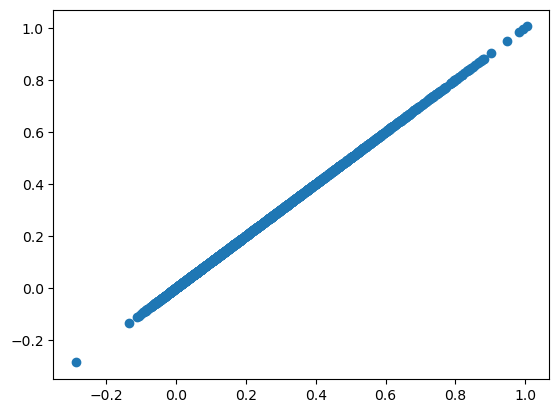

In [6]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

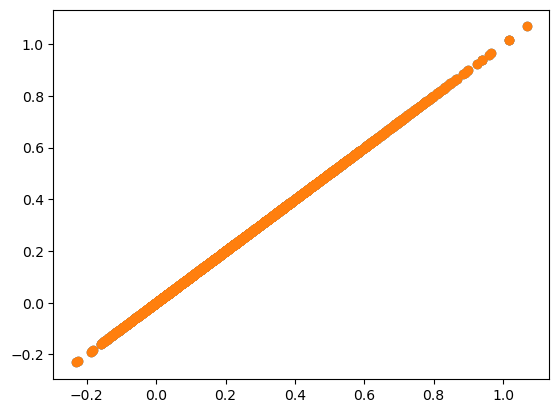

In [7]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [8]:
mycebmf.update_tau()
mycebmf.tau

array([[144.35112555, 144.35112555, 144.35112555, ..., 144.35112555,
        144.35112555, 144.35112555],
       [144.35112555, 144.35112555, 144.35112555, ..., 144.35112555,
        144.35112555, 144.35112555],
       [144.35112555, 144.35112555, 144.35112555, ..., 144.35112555,
        144.35112555, 144.35112555],
       ...,
       [144.35112555, 144.35112555, 144.35112555, ..., 144.35112555,
        144.35112555, 144.35112555],
       [144.35112555, 144.35112555, 144.35112555, ..., 144.35112555,
        144.35112555, 144.35112555],
       [144.35112555, 144.35112555, 144.35112555, ..., 144.35112555,
        144.35112555, 144.35112555]])

In [9]:
print(mycebmf.prior_F
      )

mycebmf.update_loading_factor_k(k=0)

norm


In [10]:
k=0

mycebmf.cal_partial_residuals(k=k)
compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau  )
compute_hat_f_and_s_f(Z = mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  )
 

(array([-0.20282782, -0.01983137, -0.25594406, -0.15064127, -0.00294266,
        -0.1114106 , -0.28714415, -0.19090975, -0.04386553, -0.05005378,
        -0.12863846, -0.0355771 , -0.23607357, -0.11244137, -0.15259698,
        -0.12834076, -0.18127858, -0.23770701, -0.12921978, -0.08713734,
        -0.10906075, -0.17329901, -0.07727757, -0.20522217, -0.03178824,
        -0.09416609, -0.20023015, -0.02749786, -0.01648072, -0.15787218,
        -0.17396035, -0.08096608, -0.0371727 , -0.05739657, -0.19569366,
        -0.25350296, -0.17990871, -0.21935886, -0.22892139, -0.22726499]),
 array([0.00580029, 0.00580029, 0.00580029, 0.00580029, 0.00580029,
        0.00580029, 0.00580029, 0.00580029, 0.00580029, 0.00580029,
        0.00580029, 0.00580029, 0.00580029, 0.00580029, 0.00580029,
        0.00580029, 0.00580029, 0.00580029, 0.00580029, 0.00580029,
        0.00580029, 0.00580029, 0.00580029, 0.00580029, 0.00580029,
        0.00580029, 0.00580029, 0.00580029, 0.00580029, 0.00580029,
      

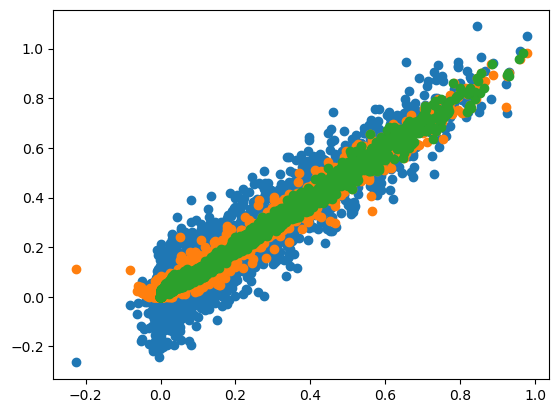

In [11]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)


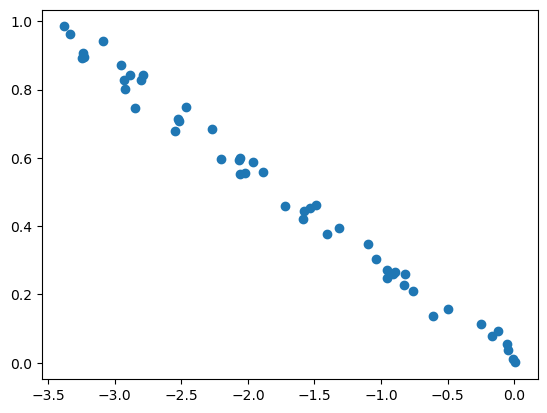

In [12]:
plt.scatter(mycebmf.L[:,0], u)

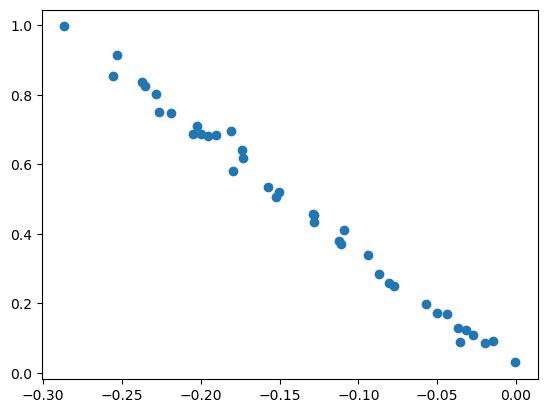

In [13]:
plt.scatter(mycebmf.F[:,0], v)

In [14]:
mycebmf.L[:,1]

array([ 3.49906300e-02,  3.75057199e-03, -2.09907582e-02,  3.76517259e-02,
       -4.05278905e-02, -6.15828366e-03,  1.07383123e-02,  3.45779190e-02,
       -3.69413465e-01,  9.10508503e-03, -2.33676854e-03,  3.34822576e-03,
        3.66308759e-01, -2.59950843e-04, -2.22479291e-02, -3.51475574e-02,
       -1.26991578e-02,  5.17270023e-02,  6.38937518e-01,  3.58202845e-03,
       -3.77887788e-02, -4.00665257e-03,  7.37110130e-03,  8.75967765e-02,
       -2.53603019e-01, -5.85261609e-03,  7.86723790e-03, -3.23645175e-02,
       -2.16937787e-02,  1.40887648e-01, -1.25878968e-01,  2.83909183e-01,
        1.75206615e-03, -2.14348407e-02,  1.08116394e-02,  8.07865595e-02,
       -3.30446519e-03, -5.41757470e-02, -2.10227676e-02, -7.51713752e-02,
       -5.41416756e-02,  4.87524244e-02, -3.38675264e-01, -1.33111424e-02,
        1.60456627e-01,  9.51337519e-04, -1.04564243e-02,  1.34760056e-02,
        1.72298942e-01, -1.24427174e-01])

In [15]:
for i in range(40):
    mycebmf.iter()

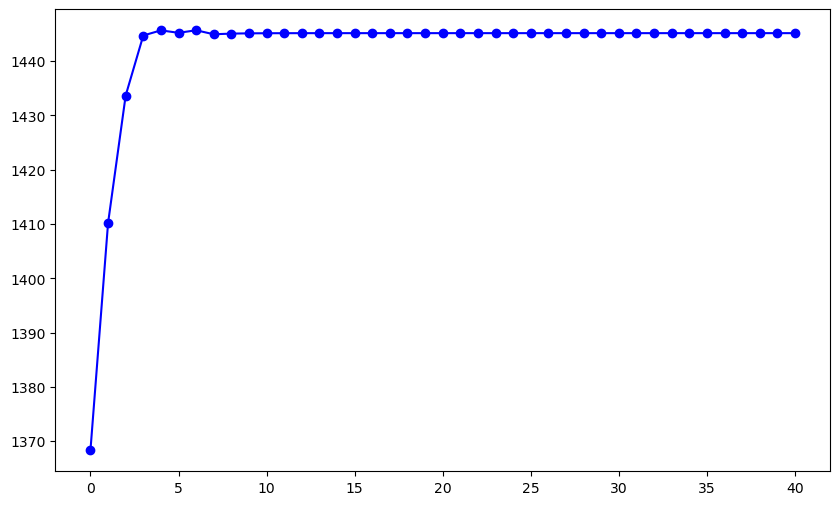

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')